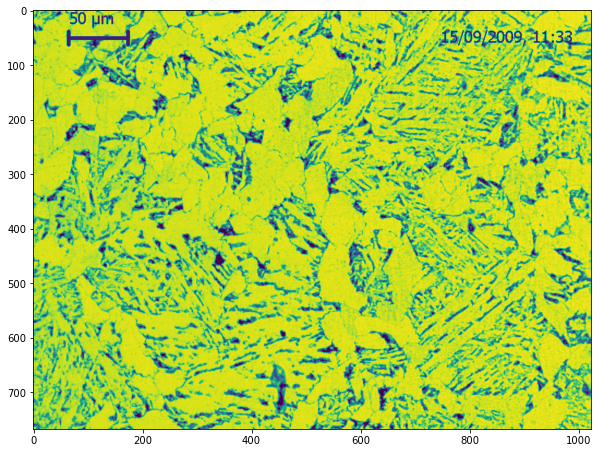

In [ ]:
# suitable libraries to import
import matplotlib.pyplot as plt
from skimage import io

import numpy as np
from skimage.filters import threshold_otsu
import cv2

#read images
img = io.imread("Sample 5-20 X.tif", as_gray=True)
# plt.axis("off")
fig=plt.figure(figsize=(10,10))
plt.imshow(img)

**USING CONCEPT OF VARIANCE**

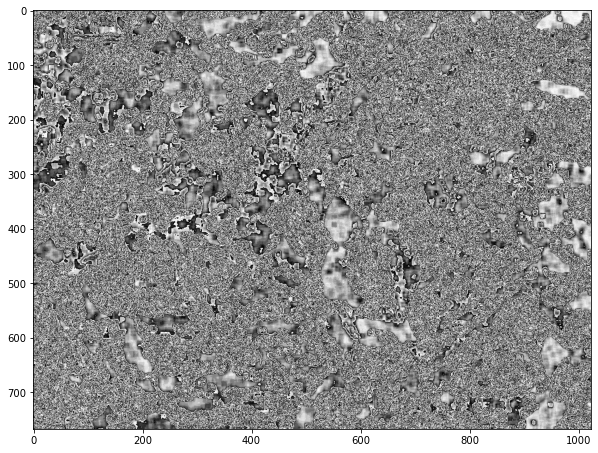

In [ ]:
#Variance - not a great way to quantify texture
from scipy import ndimage
k=10
# uniform_filter-replace the (k,k) regional values by the mean of k*k values
img_mean = ndimage.uniform_filter(img, (k, k))
img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))
img_var = img_sqr_mean - img_mean**2
fig=plt.figure(figsize=(10,10))
plt.imshow(img_var, cmap='gray')

**USING GABOR KERNEL**

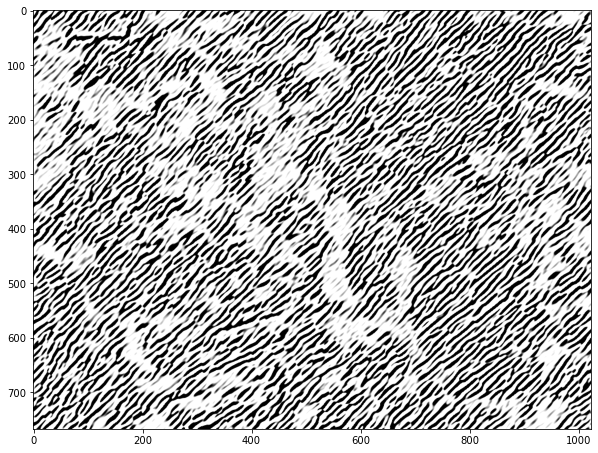

In [ ]:
#GABOR - A great filter for texture but usually efficient
#if we know exact parameters. Good choice for generating features
#for machine learning
ksize=45
theta=np.pi/4
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
fig=plt.figure(figsize=(10,10))
plt.imshow(filtered_image, cmap='gray')


**USING ENTROPY FILTER FOLLOWED BY OTSU THRESHOLDING**

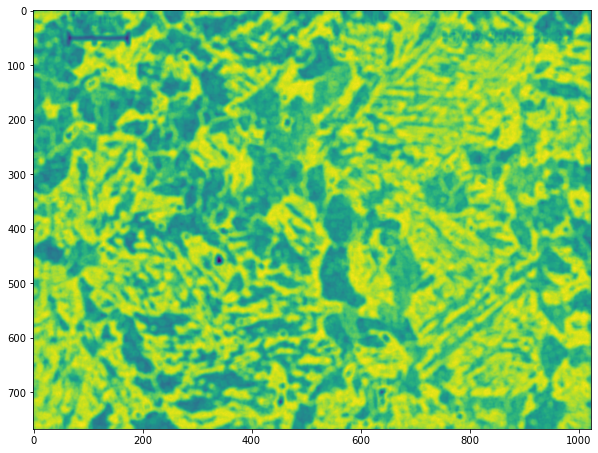

In [ ]:
#Entropy
#Entropy quantifies disorder.
#Since cell region has high variation in pixel values the entropy would be
#higher compared to scratch region
from skimage.filters.rank import entropy
from skimage.morphology import disk
entropy_img = entropy(img, disk(6))
fig=plt.figure(figsize=(10,10))
plt.imshow(entropy_img)


(array([4.0000e+00, 3.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00,
        7.0000e+00, 0.0000e+00, 6.0000e+00, 4.0000e+00, 8.0000e+00,
        7.0000e+00, 5.0000e+00, 6.0000e+00, 4.0000e+00, 5.0000e+00,
        5.0000e+00, 1.1000e+01, 5.0000e+00, 1.1000e+01, 1.2000e+01,
        6.0000e+00, 1.2000e+01, 7.0000e+00, 7.0000e+00, 1.3000e+01,
        1.3000e+01, 2.1000e+01, 3.1000e+01, 3.1000e+01, 2.5000e+01,
        4.4000e+01, 5.3000e+01, 5.0000e+01, 6.8000e+01, 8.4000e+01,
        8.8000e+01, 8.7000e+01, 9.5000e+01, 1.3900e+02, 1.9700e+02,
        2.8300e+02, 3.9200e+02, 5.3100e+02, 6.9400e+02, 9.6400e+02,
        1.1830e+03, 1.4900e+03, 1.9270e+03, 2.3050e+03, 2.8400e+03,
        3.2370e+03, 3.6910e+03, 4.0240e+03, 4.7010e+03, 5.1300e+03,
        5.6700e+03, 6.0250e+03, 6.4720e+03, 6.6850e+03, 7.1980e+03,
        7.7760e+03, 7.9840e+03, 8.3880e+03, 8.67

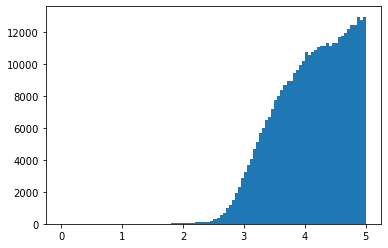

In [ ]:
#Scratch Analysis - single image
#Now let us use otsu to threshold high vs low entropy regions.
plt.hist(entropy_img.flat, bins=100, range=(0,5))  #.flat returns the flattened numpy array (1D)

4.74454075719945


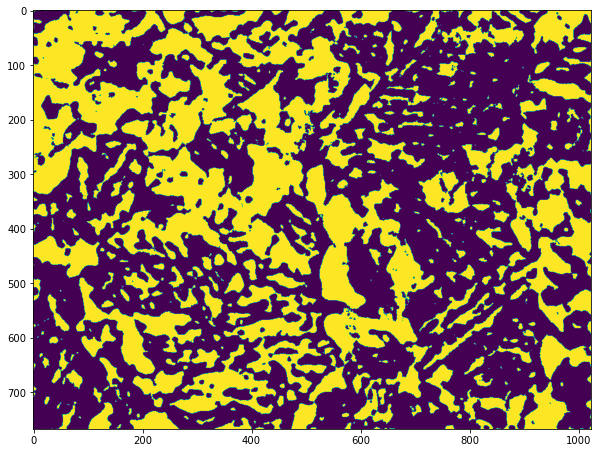

In [ ]:
thresh = threshold_otsu(entropy_img)
print(thresh)
#Now let us binarize the entropy image
binary = entropy_img <= thresh
fig=plt.figure(figsize=(10,10))
plt.imshow(binary)